In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci

path_gps_csv = os.path.join('..','..','Data','Raw','googleplaystore.csv')
path_gps_usr_rev_csv = os.path.join('..','..','Data','Raw','googleplaystore_user_reviews.csv')
path_comb_csv = os.path.join('..','..','Data','Combined','comb.csv')


In [3]:
# import data
gps_df = pd.read_csv(path_gps_csv, low_memory=False)
gps_usr_rev_df = pd.read_csv(path_gps_usr_rev_csv, low_memory=False)
comb_df = pd.read_csv(path_comb_csv, low_memory=False)

In [4]:
gps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
# What genre of app had the greatest installs

no_rep_df = gps_df.copy()
no_rep_df = no_rep_df.drop_duplicates(['App'])

slim_df = no_rep_df[['App', 'Installs', 'Genres']].copy()
grup_gvi_df = slim_df.groupby(['Genres']).agg({
    'Installs' : 'max',
    'App' : 'count',
})

sorted_df = grup_gvi_df.sort_values("Installs", ascending=False)
sorted_df = sorted_df.drop('February 11, 2018')
top_install_gen = sorted_df.loc[sorted_df['Installs'] == '500,000,000+']

In [6]:
GVI_final_df = top_install_gen.sort_values(['App'], ascending=False)

In [7]:
# GVI_final_df.to_csv('Output/Genre-Vs-Install-Final-Table.csv', sep='\t')

In [8]:
GVI_final_df

,Installs,App
Genres,,
Tools,"500,000,000+",826
Productivity,"500,000,000+",374
Communication,"500,000,000+",315
Action,"500,000,000+",299
Health & Fitness,"500,000,000+",288
News & Magazines,"500,000,000+",254
Social,"500,000,000+",239
Casual,"500,000,000+",165
Video Players & Editors,"500,000,000+",162


In [9]:
# Graph the data above ^

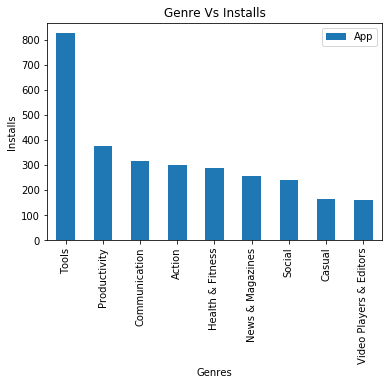

In [17]:
plt.close()
GVI_final_df.plot(kind='bar', title='Genre Vs Installs')
plt.ylabel('Installs')
plt.savefig('Output/GVI-bar.png', pad_inches=0.1, bbox_inches='tight')
plt.show()

In [47]:
FVP_base = gps_df[['App', 'Type', 'Installs']]
grup_FVP = FVP_base.groupby(['Type']).agg({
    'Installs' : 'max',
    'App' : 'count',
})
grup_FVP = grup_FVP.drop(grup_FVP.index[0])

grup_FVP

,Installs,App
Type,,
Free,"500,000,000+",10039
Paid,"500,000+",800


In [61]:
grup_FVP.to_csv('Output/Free-vs-Paid-Final-Table.csv', sep='\t')

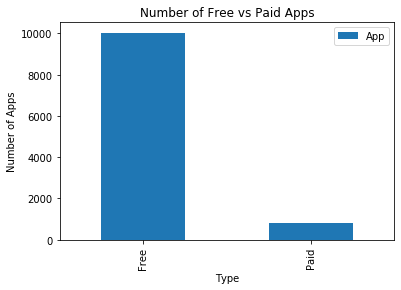

In [59]:
plt.close()
grup_FVP.reset_index().plot(kind='bar', y='App', x='Type', title='Number of Free vs Paid Apps')
plt.ylabel('Number of Apps')
plt.savefig('Output/FVP-bar-1.png', pad_inches=0.1, bbox_inches='tight')
plt.show()